# Import Library

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)

# Import Dataset

In [35]:
df = pd.read_csv('dataset/Demand forecast/train_0irEZ2H.csv')
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


# Data Cleaning

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [37]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150149 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150149 non-null  int64  
 1   week             150149 non-null  object 
 2   store_id         150149 non-null  int64  
 3   sku_id           150149 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150149 non-null  float64
 6   is_featured_sku  150149 non-null  int64  
 7   is_display_sku   150149 non-null  int64  
 8   units_sold       150149 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 11.5+ MB


In [38]:
df.duplicated().sum()

0

In [39]:
df['week'] = pd.to_datetime(df['week'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150149 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150149 non-null  int64         
 1   week             150149 non-null  datetime64[ns]
 2   store_id         150149 non-null  int64         
 3   sku_id           150149 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150149 non-null  float64       
 6   is_featured_sku  150149 non-null  int64         
 7   is_display_sku   150149 non-null  int64         
 8   units_sold       150149 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 11.5 MB


In [40]:
df.describe()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150149.000000,150149,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000
mean,106270.971795,2012-04-18 17:50:55.213155072,9199.420935,254761.195226,206.626751,219.424262,0.095612,0.133201,51.674543
min,1.000000,2011-01-08 00:00:00,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.000000,2011-08-22 00:00:00,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.000000,2012-04-09 00:00:00,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.000000,2012-11-20 00:00:00,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,2013-12-03 00:00:00,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000
std,61385.825580,NaN,615.593192,85547.587866,103.308516,110.960204,0.294059,0.339793,60.207962


In [41]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

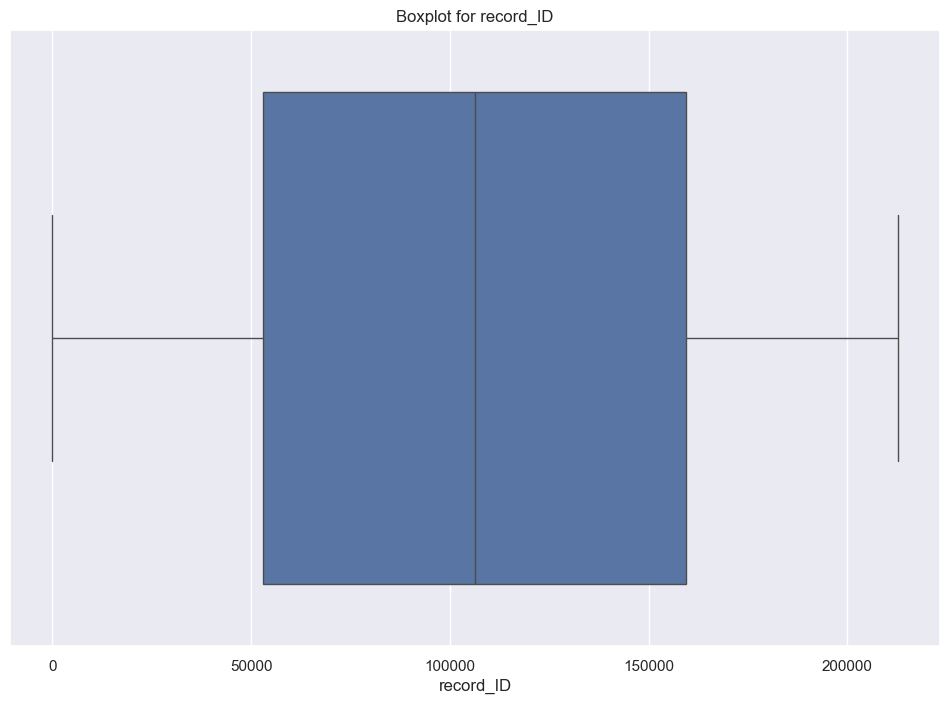

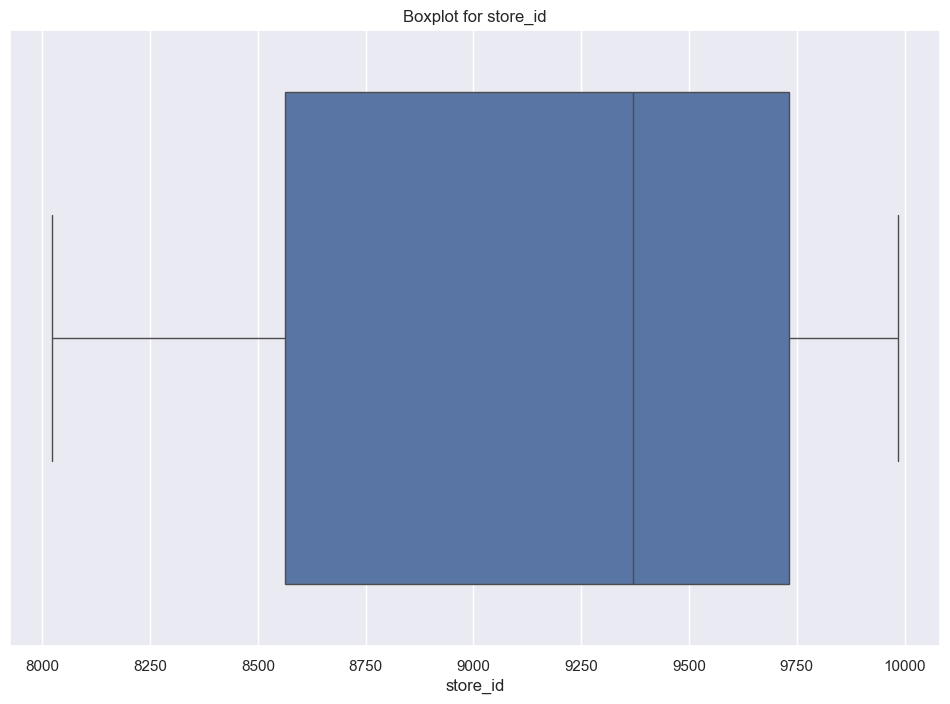

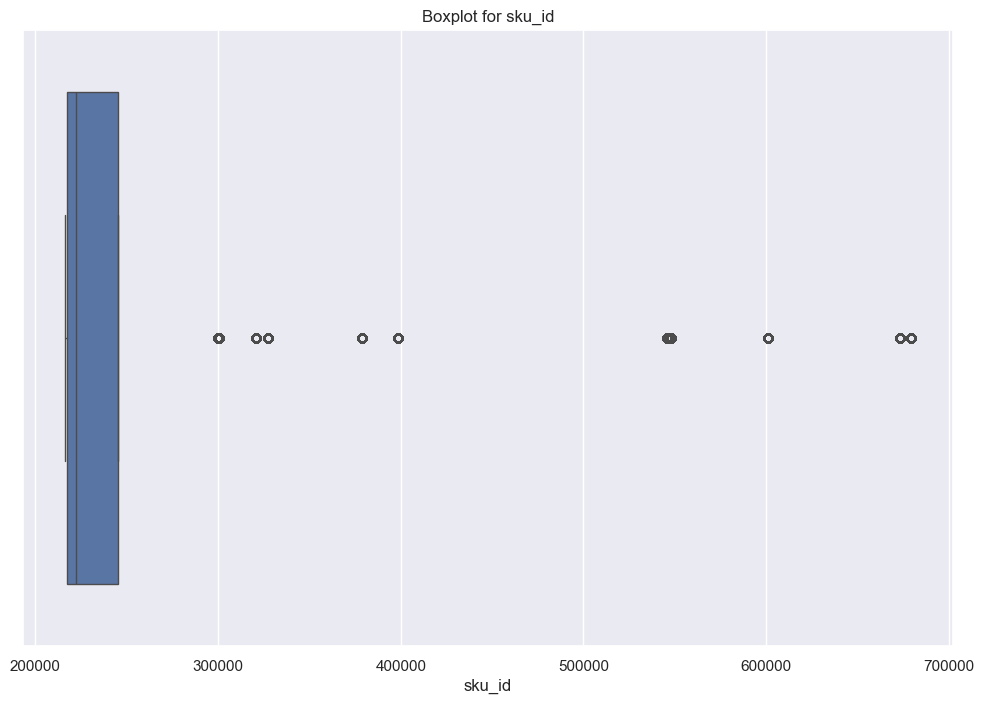

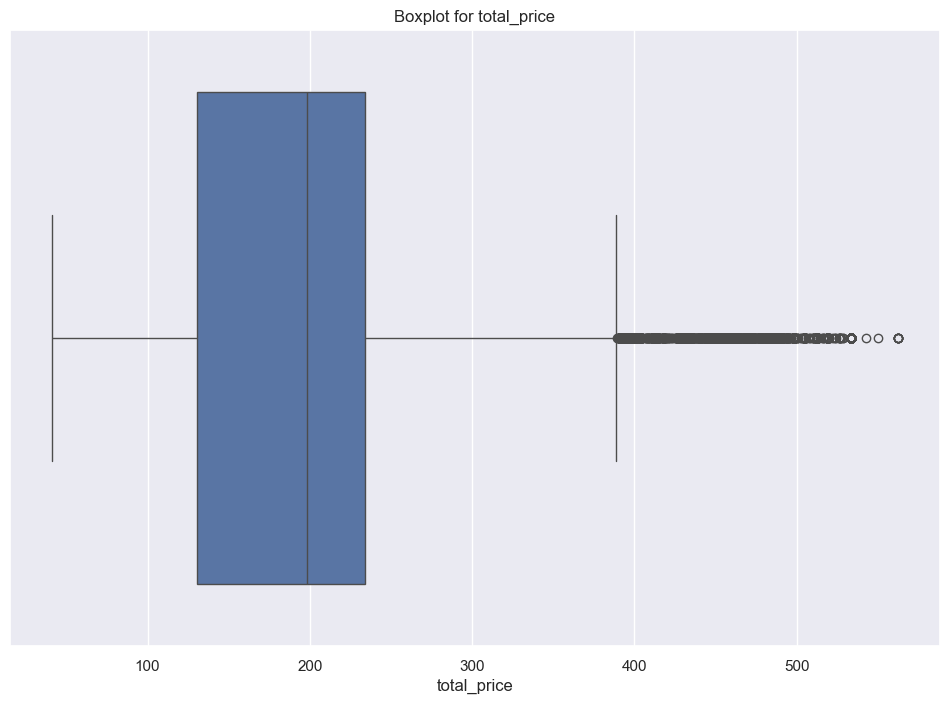

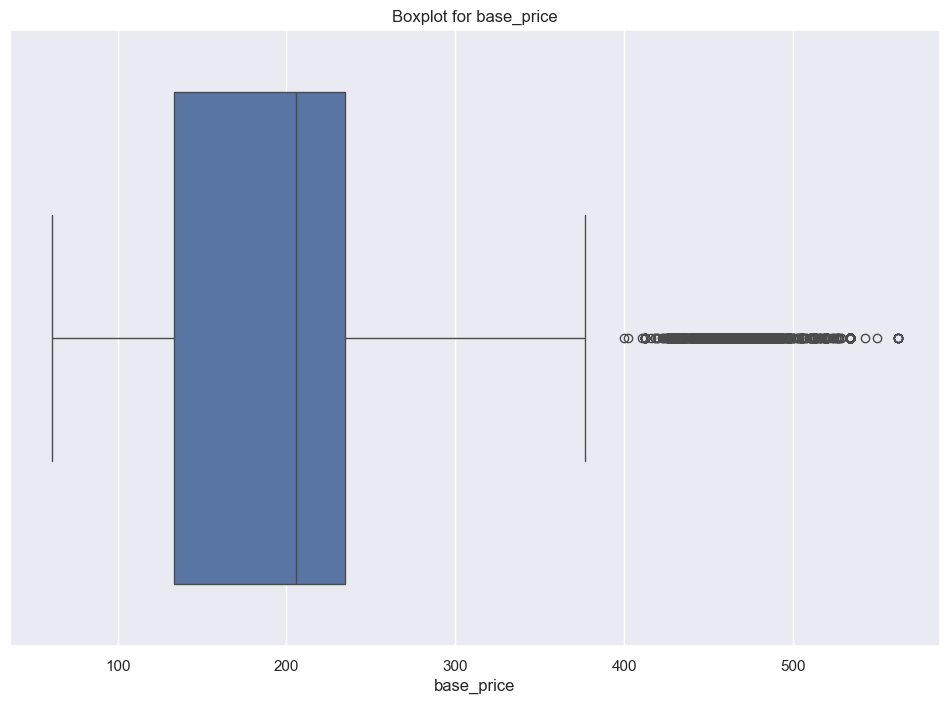

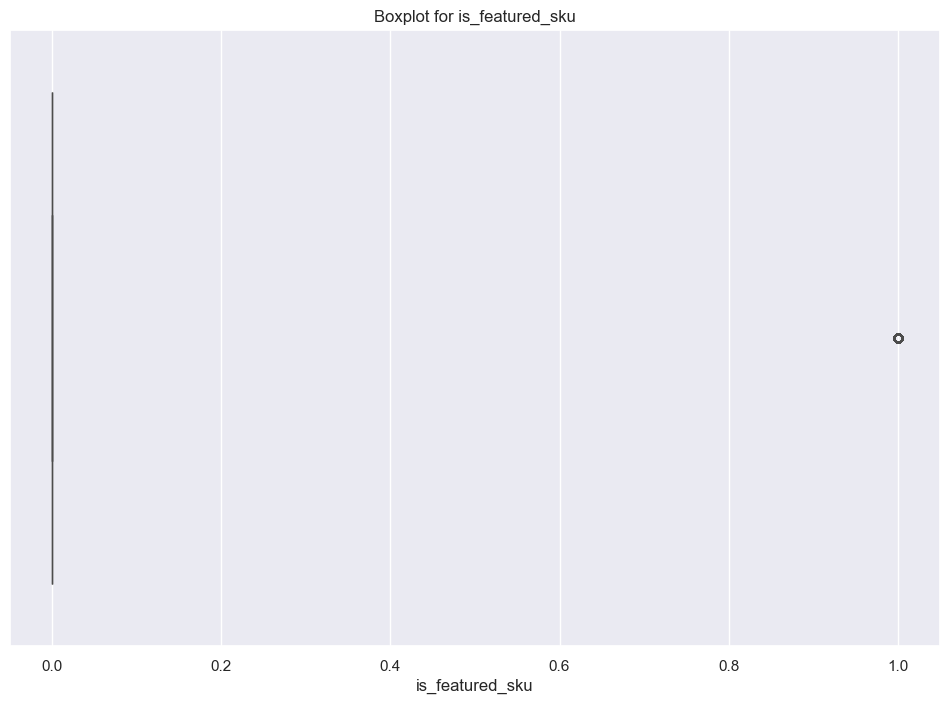

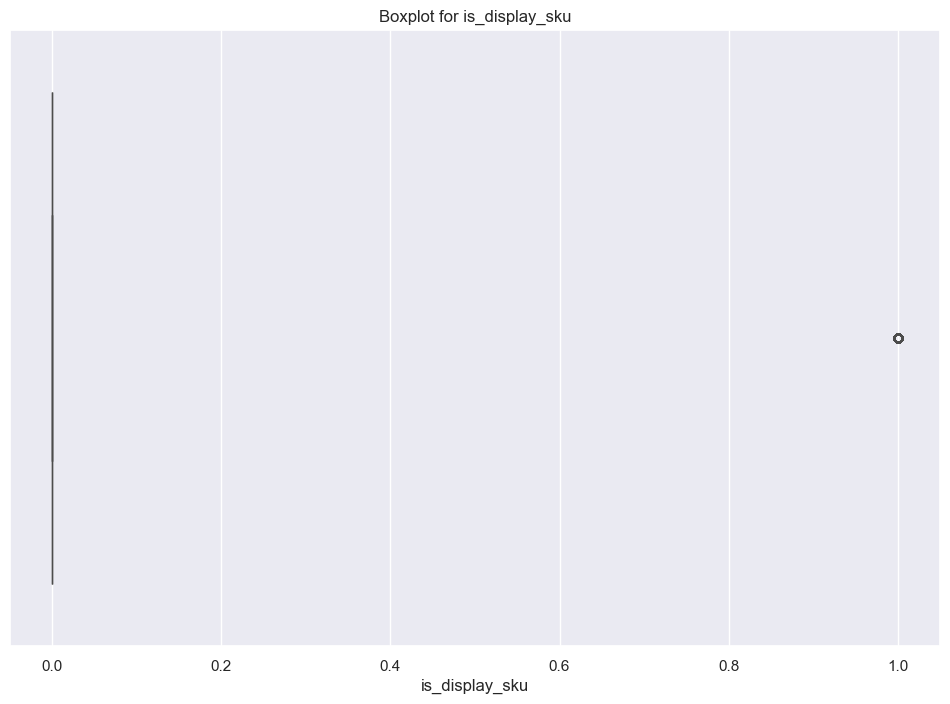

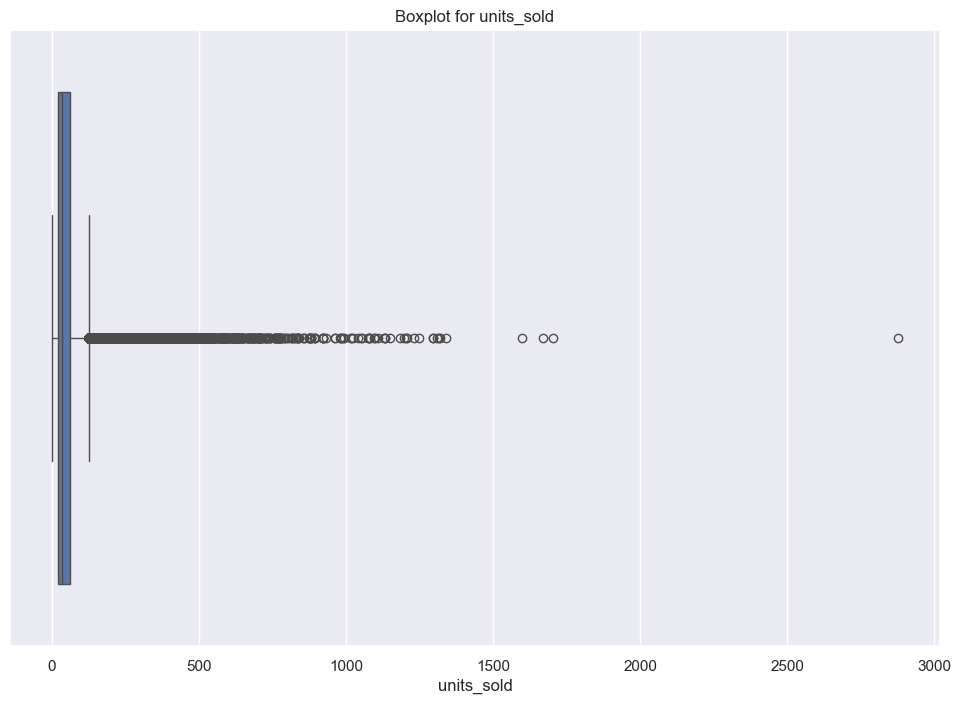

In [42]:
for column in numerical_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=column, data=df)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150149 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150149 non-null  int64         
 1   week             150149 non-null  datetime64[ns]
 2   store_id         150149 non-null  int64         
 3   sku_id           150149 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150149 non-null  float64       
 6   is_featured_sku  150149 non-null  int64         
 7   is_display_sku   150149 non-null  int64         
 8   units_sold       150149 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 11.5 MB


In [44]:
week = df.groupby(['week'])['units_sold'].sum().sort_values(ascending=False)
week

week
2011-02-14    109207
2011-12-12    100252
2012-06-03     88928
2011-02-28     84153
2011-02-21     82986
               ...  
2012-07-31     45214
2011-01-08     44134
2011-12-09     43477
2012-11-20     37204
2012-03-20     25220
Name: units_sold, Length: 130, dtype: int64

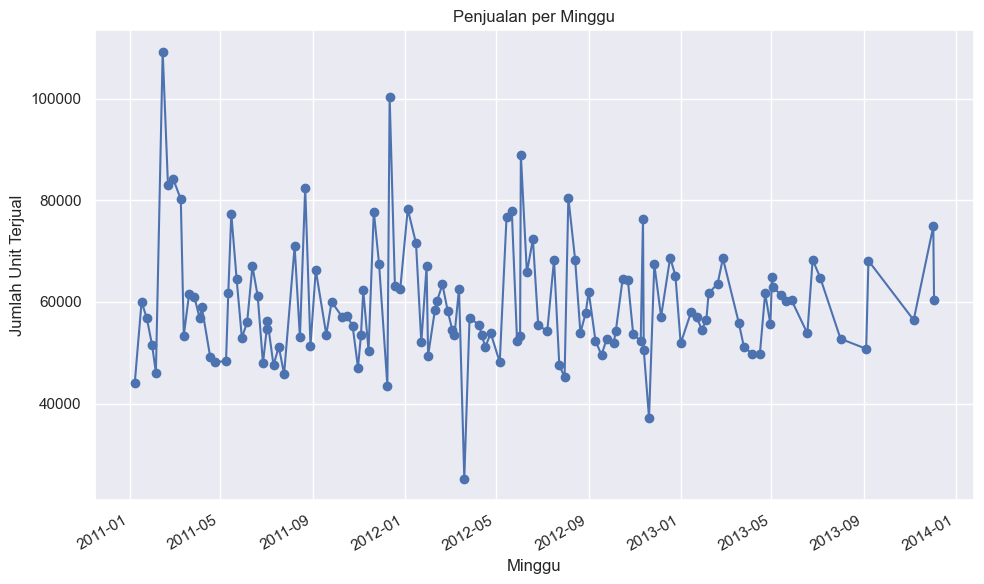

In [45]:
plt.figure(figsize=(10, 6))
week.plot(kind='line', marker='o', color='b', linestyle='-')

# Menyeting judul dan label sumbu
plt.title('Penjualan per Minggu')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Unit Terjual')

# Menyeting grid
plt.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [46]:
store = df.groupby(['store_id'])['units_sold'].sum().sort_values(ascending=False).head()

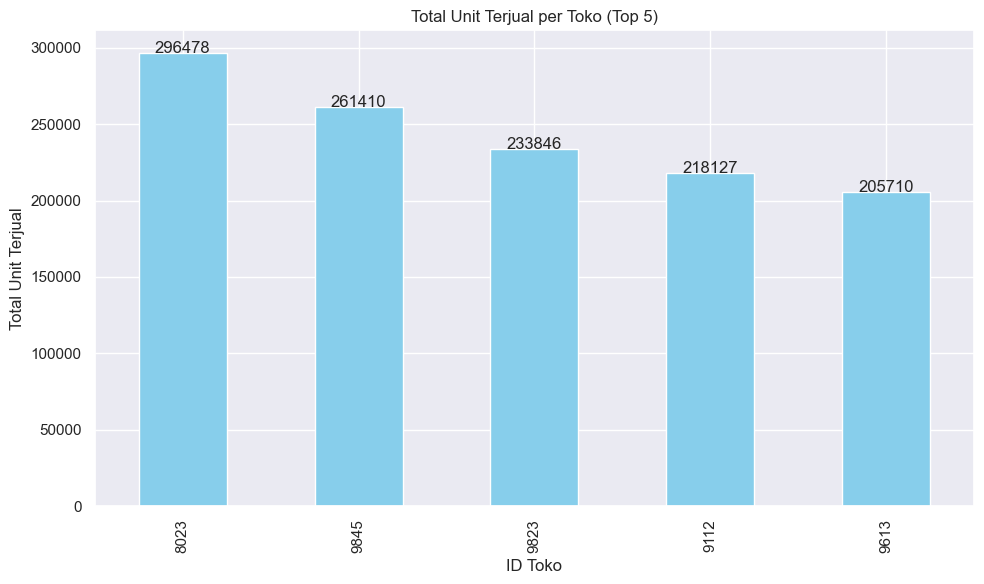

In [47]:
plt.figure(figsize=(10, 6))
store.plot(kind='bar', color='skyblue')

# Menyeting judul dan label sumbu
plt.title('Total Unit Terjual per Toko (Top 5)')
plt.xlabel('ID Toko')
plt.ylabel('Total Unit Terjual')

# Menampilkan nilai di atas tiap bar
for index, value in enumerate(store):
    plt.text(index, value + 0.1, str(value), ha='center')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [48]:
df['is_featured_sku'].value_counts()

is_featured_sku
0    135793
1     14356
Name: count, dtype: int64

In [49]:
df['is_display_sku'].value_counts()

is_display_sku
0    130149
1     20000
Name: count, dtype: int64

In [50]:
df['store_id'].value_counts()

store_id
8094    3120
8991    2990
9823    2990
8023    2730
8438    2730
        ... 
8091    1170
9439    1170
9178     780
9700     650
9001     260
Name: count, Length: 76, dtype: int64

In [51]:
df.corr()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
record_ID,1.000000,9.536022e-01,0.007461,-4.762228e-04,0.008473,0.018911,0.031361,0.020432,-0.010608
week,0.953602,1.000000e+00,-0.000003,9.719008e-07,0.009400,0.017360,0.031963,0.024491,-0.008172
store_id,0.007461,-3.390892e-06,1.000000,-6.862831e-02,-0.038315,-0.038855,-0.008729,0.013441,-0.004369
sku_id,-0.000476,9.719008e-07,-0.068628,1.000000e+00,0.119332,0.119071,-0.022255,0.014910,-0.184381
total_price,0.008473,9.399562e-03,-0.038315,1.193319e-01,1.000000,0.958885,0.050354,-0.065930,-0.235625
base_price,0.018911,1.736042e-02,-0.038855,1.190713e-01,0.958885,1.000000,0.214341,0.051916,-0.140022
is_featured_sku,0.031361,3.196299e-02,-0.008729,-2.225515e-02,0.050354,0.214341,1.000000,0.426242,0.337750
is_display_sku,0.020432,2.449089e-02,0.013441,1.491029e-02,-0.065930,0.051916,0.426242,1.000000,0.362661
units_sold,-0.010608,-8.171738e-03,-0.004369,-1.843808e-01,-0.235625,-0.140022,0.337750,0.362661,1.000000


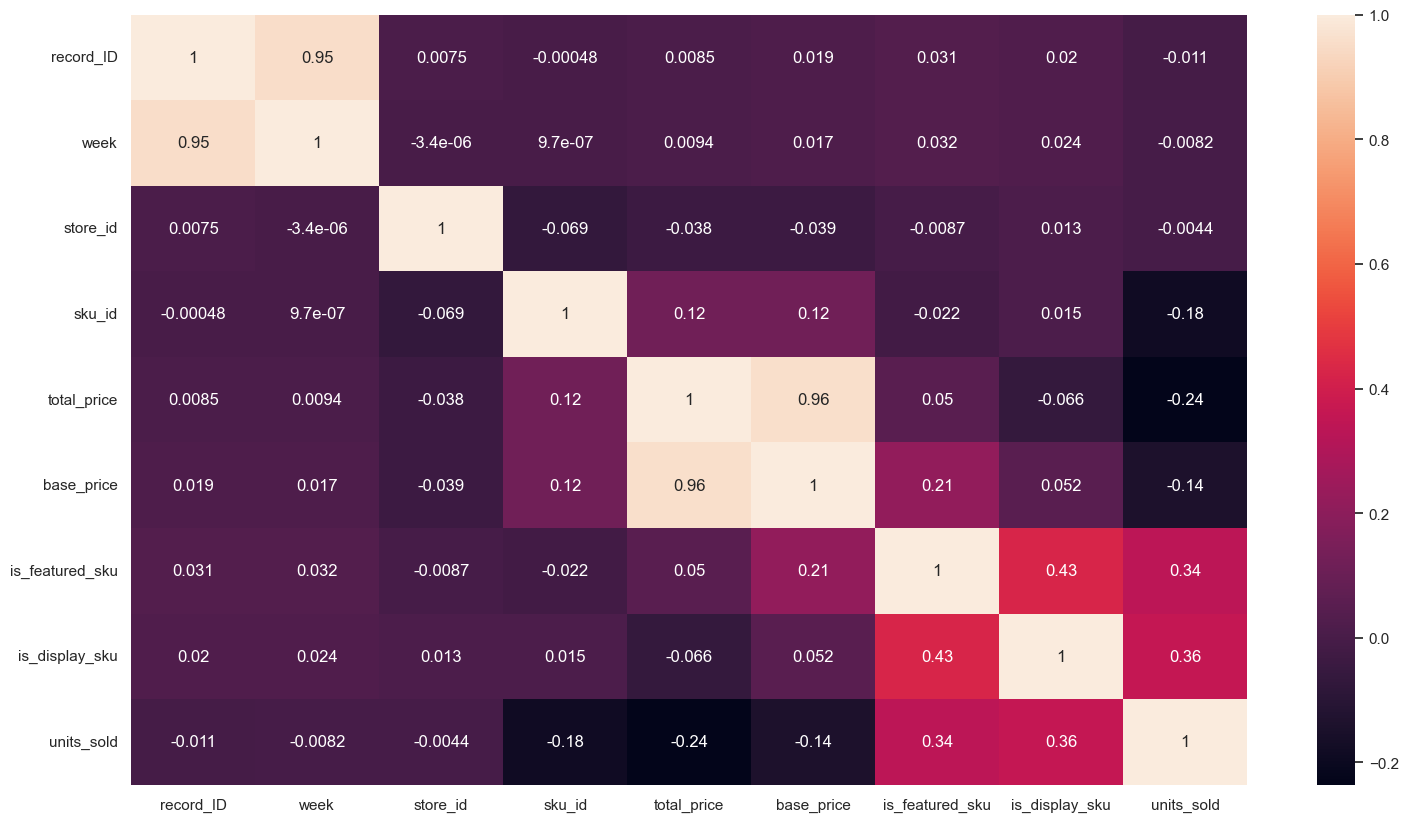

In [52]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [53]:
X = df.drop(['units_sold', 'week', 'record_ID'], axis=1)
y = df['units_sold']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah: \n', X_train.shape, ' \nSedangkan Jumlah baris dan kolom dari y_train adalah: \n', y_train.shape)
print('Jumlah baris dan kolom dari x_test adalah: \n', X_test.shape,'\nSedangkan Jumlah baris dan kolom dari y_test adalah: \n', y_test.shape)

Jumlah baris dan kolom dari x_train adalah: 
 (120119, 6)  
Sedangkan Jumlah baris dan kolom dari y_train adalah: 
 (120119,)
Persentase Stroke di data Training adalah:
units_sold
15      2499
18      2382
17      2315
23      2296
14      2278
        ... 
775        1
582        1
443        1
1599       1
1052       1
Name: count, Length: 679, dtype: int64
Jumlah baris dan kolom dari x_test adalah: 
 (30030, 6) 
Sedangkan Jumlah baris dan kolom dari y_test adalah: 
 (30030,)
Persentase Stroke di data Testing adalah:
units_sold
18     642
15     629
17     624
21     568
14     564
      ... 
342      1
547      1
740      1
329      1
351      1
Name: count, Length: 462, dtype: int64


In [57]:
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 98%|█████████▊| 41/42 [1:59:03<06:17, 377.09s/it]   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 120119, number of used features: 6
[LightGBM] [Info] Start training from score 51.858765


100%|██████████| 42/42 [1:59:05<00:00, 170.12s/it]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
XGBRegressor                                 0.78       0.78  26.65   
LGBMRegressor                                0.75       0.75  28.77   
HistGradientBoostingRegressor                0.74       0.74  29.14   
RandomForestRegressor                        0.74       0.74  29.37   
BaggingRegressor                             0.72       0.72  30.29   
ExtraTreesRegressor                          0.69       0.69  31.73   
KNeighborsRegressor                          0.66       0.66  33.34   
GradientBoostingRegressor                    0.60       0.60  36.22   
DecisionTreeRegressor                        0.58       0.58  37.22   
ExtraTreeRegressor                           0.52       0.52  39.72   
MLPRegressor                                 0.46       0.46  41.87   
PoissonRegressor                             0.32       0.32  47.10   
NuSVR 

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import math
def evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2:', r2)

    df_comparison = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    print(df_comparison)

In [61]:
evaluate(XGBRegressor())

MAE: 14.58119753350566
MSE: 710.4050168514458
RMSE: 26.65342411119903
R2: 0.7829134123329317
        y_test  y_pred
144782      41   37.44
117         13   33.70
77408      339  307.12
62193       14   19.94
143901       4   12.84
...        ...     ...
103576     106   94.58
55307       90   51.69
97035       31   33.20
102934      21   16.03
110481      36   32.68

[30030 rows x 2 columns]


In [62]:
evaluate(LGBMRegressor())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 120119, number of used features: 6
[LightGBM] [Info] Start training from score 51.858765
MAE: 16.88254152436565
MSE: 832.186815447705
RMSE: 28.84764835212231
R2: 0.7456991550147736
        y_test  y_pred
144782      41   39.78
117         13   31.58
77408      339  332.32
62193       14   18.56
143901       4   19.58
...        ...     ...
103576     106   92.18
55307       90   62.07
97035       31   43.48
102934      21   18.80
110481      36   39.39

[30030 rows x 2 columns]


In [64]:
evaluate(HistGradientBoostingRegressor())

MAE: 16.887291278768693
MSE: 843.0585046250308
RMSE: 29.03546976759685
R2: 0.7423769685863293
        y_test  y_pred
144782      41   42.89
117         13   28.33
77408      339  342.97
62193       14   17.72
143901       4   17.27
...        ...     ...
103576     106   88.07
55307       90   59.71
97035       31   44.92
102934      21   17.83
110481      36   38.21

[30030 rows x 2 columns]


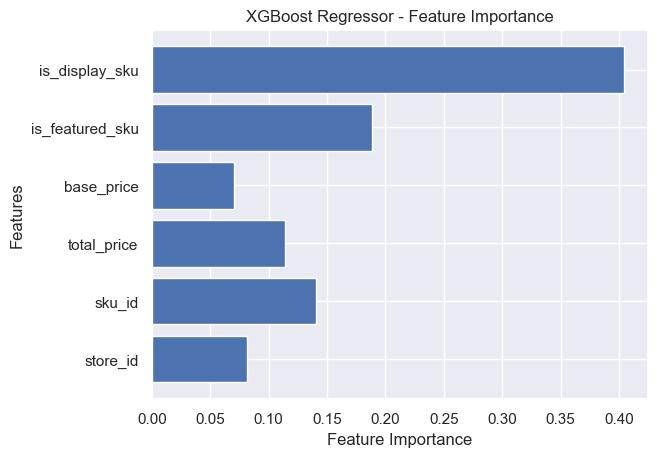

In [65]:
xgb = XGBRegressor()
xgb = xgb.fit(X_train,y_train)
feature_importances = xgb.feature_importances_
features = X.columns

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Regressor - Feature Importance')
plt.show()